# Assignment 4
### Do three of four.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exercise 1: Contingent Comparisons
- Load the Minnesota use of force data.
- Bootstrap the proportion of missing values for `subject_injury` for each race, and plot the results with grouped KDE and ECDF plots
- Describe what you see. When we consider second order uncertainty, how similar or different are the sampling distributions of these proportions? 

In [5]:
df = pd.read_csv('data/mn_police_use_of_force.csv')

In [23]:
df['subject_injury_Asian_na'] = df.loc[df['race'] == 'Asian', 'subject_injury'].isna().astype(int)
df['subject_injury_Black_na'] = df.loc[df['race'] == 'Black', 'subject_injury'].isna().astype(int)
df['subject_injury_White_na'] = df.loc[df['race'] == 'White', 'subject_injury'].isna().astype(int)
df['subject_injury_Other_na'] = df.loc[df['race'] == 'Other / Mixed Race', 'subject_injury'].isna().astype(int)
df['subject_injury_Native_na'] = df.loc[df['race'] == 'Native American', 'subject_injury'].isna().astype(int)

In [10]:
def stat(x):
    stat = np.mean(x)
    return stat

In [26]:
def simulate(var, df, fcn, S=1000, plot=True):
    ''' Bootstrap simulation code. '''    
    x = df[var]

    estimates = []
    for s in range(S):
        # Draw a new sample, with replacement:
        x_s = x.sample(frac=1.0,replace=True)
        # Compute statistic:
        stat_s = fcn(x_s)
        # Append estimate:
        estimates.append(stat_s)
    estimates = np.array(estimates) # Convert estimates list to numpy array

    ## or in one line, 
    #estimates = [fcn(x.sample(frac=1.0,replace=True)) for s in range(S)]

    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 2 columns
        sns.kdeplot(x, ax = axes[0]).set(title='KDE of Underlying Data')
        sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics')
        axes[1].axvline(x=fcn(x), color='orange', linestyle='--')
        sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics')
        axes[2].axvline(x=fcn(x), color='orange', linestyle='--')
        plt.show()
        print(f'Variance of estimates is: {np.var(estimates)}')
        
    return estimates

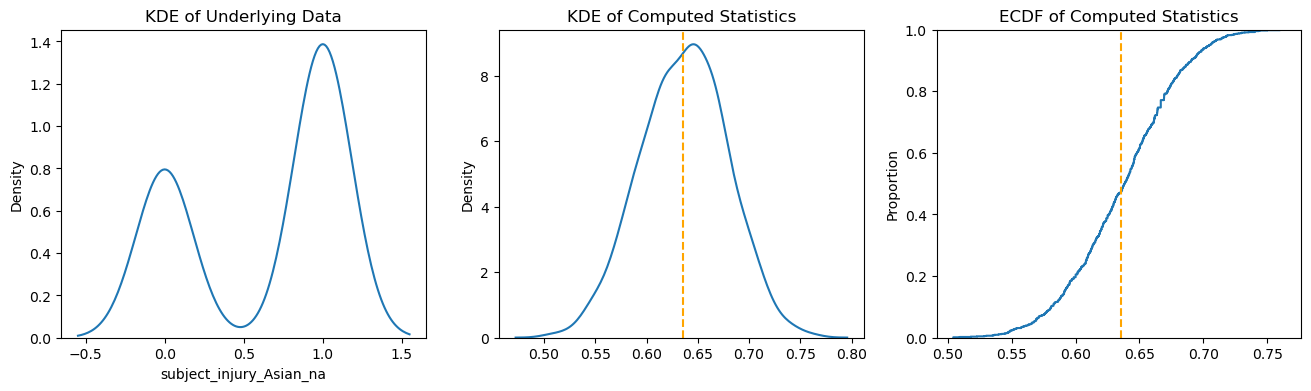

Variance of estimates is: 0.0017784757257267767


In [29]:
var = 'subject_injury_Asian_na'
estimates = simulate(var, df, stat)

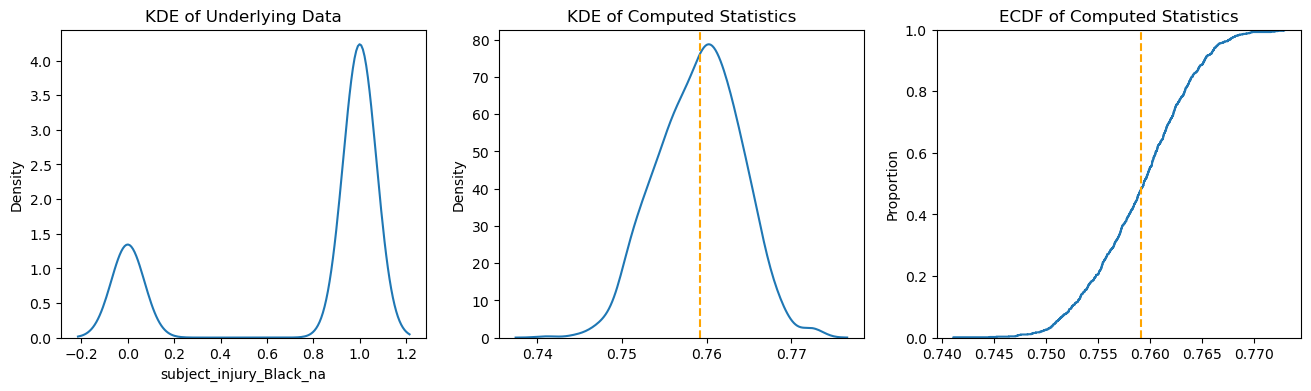

Variance of estimates is: 2.360930158702661e-05


In [30]:
var = 'subject_injury_Black_na'
estimates = simulate(var, df, stat)

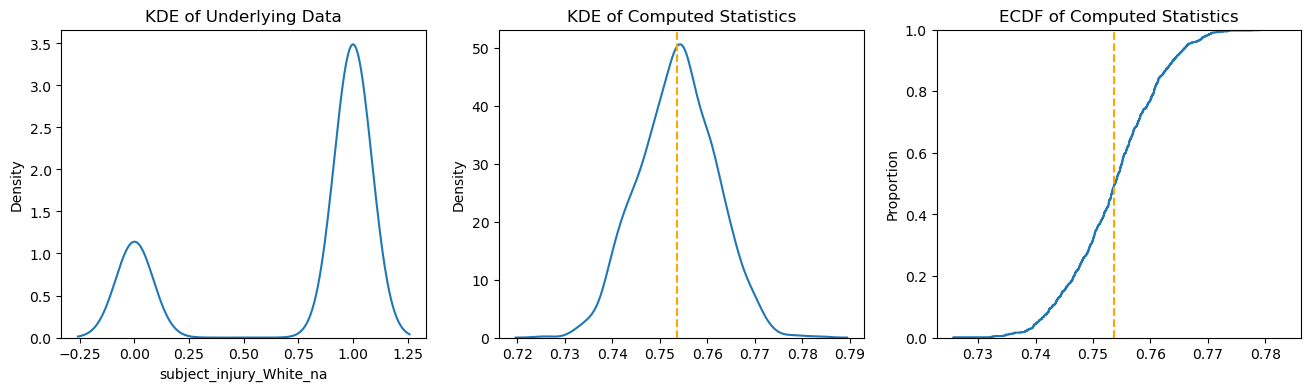

Variance of estimates is: 6.426292253848826e-05


In [31]:
var = 'subject_injury_White_na'
estimates = simulate(var, df, stat)

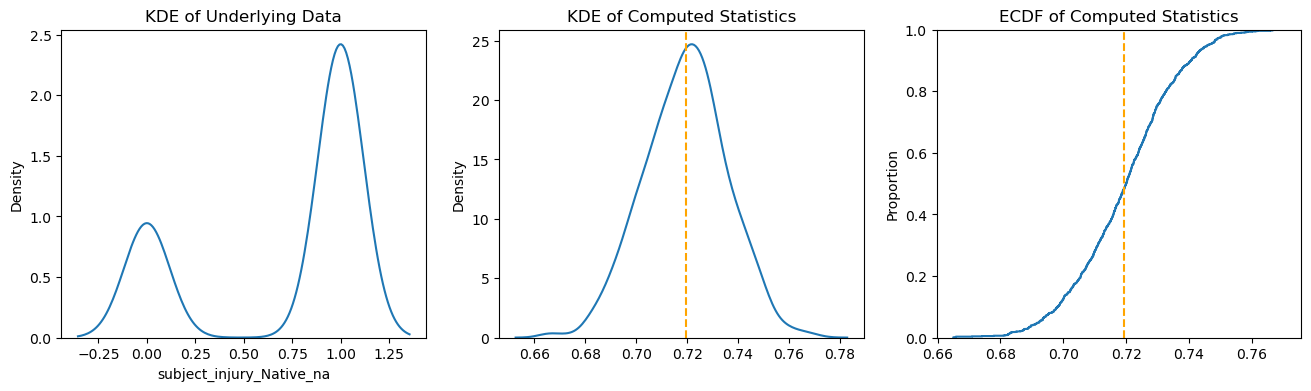

Variance of estimates is: 0.0002670289443214791


In [32]:
var = 'subject_injury_Native_na'
estimates = simulate(var, df, stat)

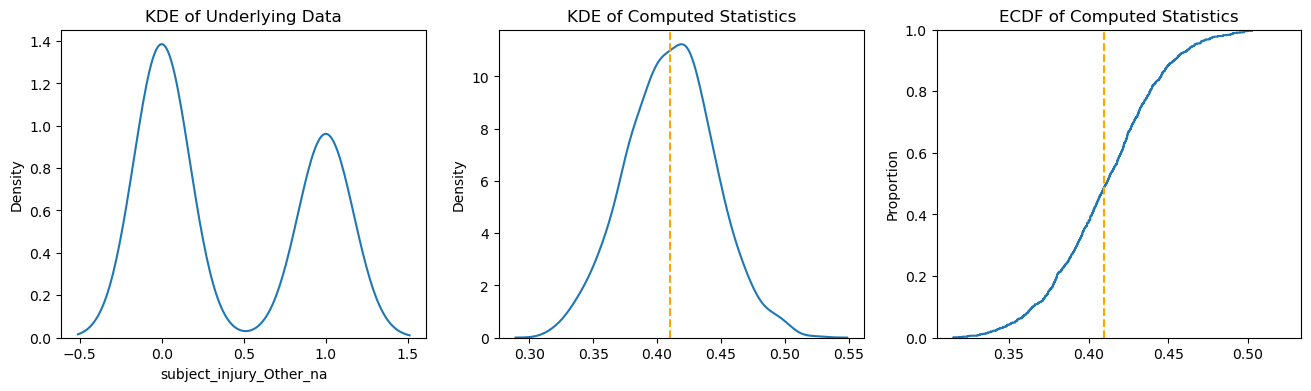

Variance of estimates is: 0.001173418021572118


In [33]:
var = 'subject_injury_Other_na'
estimates = simulate(var, df, stat)

### Exercise 2: Invitation to Inference
- Run the simulation code line by line and comment what each line is doing, or write your own code to do the resampling
- Open the NHANES or Ames prices or College Completion data. Pick a variable and a statistic to compute (e.g. mean, median, variance, IQR)
- Use the `simulate` function from class to get a sample of estimates for your statistic and your data
- Create a new function, `interval(L,H,estimates)`, that computes the $L$-th and $H$-th quantiles for your estimates, $H>L$
- If $L=.05$ and $H=.95$, this is a **90-percent confidence interval**: "For our statistic, this interval captures the true value of the population parameter 90 percent of the time. (We are 90% **confident** that it includes the true value of the parameter, but the probability that the true parameter lies in this interval is 0 or 1.)"
- We will spend much more time on this later in class, but for people who have done hypothesis testing before, you now know how to do it directly from the data: No central limit theorem required.

In [53]:
df2 = pd.read_csv('data/ames_prices.csv')

In [54]:
df2.dtypes

Order              int64
PID                int64
area               int64
price              int64
MS.SubClass        int64
                   ...  
Misc.Val           int64
Mo.Sold            int64
Yr.Sold            int64
Sale.Type         object
Sale.Condition    object
Length: 82, dtype: object

In [55]:
def stat(x): #stat function
    stat = np.mean(x) #takes mean of input array
    return stat #returns mean

In [58]:
var = "price" #variable that we are bootsrtapping
df = df2 #datafram that the var comes from
fcn = stat #statistic function that we are using
S = 1000 #number of bootstrap samples
plot = True #choose if you want ti plot results

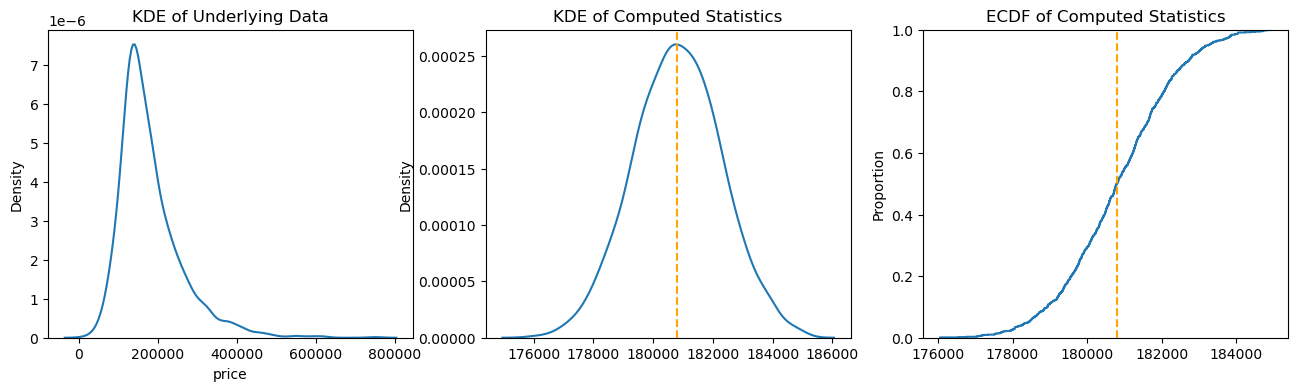

Variance of estimates is: 2150953.180779444


In [59]:
x = df[var] #list of  all values for the chosen variable
estimates = [] #create empty list to store estimates
for s in range(S): #for each bootstrap sample
    x_s = x.sample(frac=1.0,replace=True) #get a new sample, and then replace it
    stat_s = fcn(x_s) #get the statistic for that sample
    estimates.append(stat_s) #add estimate to list
estimates = np.array(estimates) # Convert estimates list to numpy array

if plot: #plot results if plot is true
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # create 3 subplots in one row
    sns.kdeplot(x, ax = axes[0]).set(title='KDE of Underlying Data') #plot kde of underlying data
    sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics') #plot kde of estimates
    axes[1].axvline(x=fcn(x), color='orange', linestyle='--') #add vertical line for the observed statistic for estimates kde
    sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics') #plot ecdf of estimates
    axes[2].axvline(x=fcn(x), color='orange', linestyle='--') #add vertical line for the observed statistic for estimates ecdf
    plt.show() #show the plots
    print(f'Variance of estimates is: {np.var(estimates)}') #print variance of estimates

In [ ]:
# using estimates variable from prevoius cell

In [60]:
def interval(L, H, estimates):

    sorted_x = np.sort(estimates)
    index_L = int(np.floor(L * (len(estimates) - 1)))
    index_H = int(np.floor(H * (len(estimates) - 1)))
    x_L = sorted_x[index_L]
    x_H = sorted_x[index_H]
    return x_L, x_H

In [61]:
print(interval(0.05, 0.95, estimates))

(np.float64(178406.18020477815), np.float64(183252.15767918088))


### Exercise 3: Intro to A/B Testing
- Go here, and read about this study: https://www.clinicaltrials.gov/study/NCT01985360
- Read the Study Overview and explain what the goal of the trial is 
- Read the Study Plan and explain how it was designed and why -- there's lots of medical jargon, but the main point is how patients were assigned to interventions. 
- Read the Results Posted: Go to **Outcome Measures**. Explain how table 1 ("Incidence of Death from Any Cause or Myocardial Infarction") is a contingency table. These are the data for this exercise.
- What is the difference in surival rates between the invasive strategy and the conservative strategy?
- Bootstrap the survival rates for the two groups, and plot them as KDEs and ECDFs against one another
- Bootstrap the difference in surival rates, and plot it as a KDE and ECDF
- Is this an effective health intervention? Explain your answer clearly

This would be what CS people call **A/B testing** and everyone else called a **randomized controlled trial**: Using randomized assignment to detect the difference in outcomes between two groups. (We've just done a non-parametric version of a two-sample t-test.)

Goal: THe goal of this study is to determine the best management strategy for patients with  SIHD (a heart disease), moderate or worse inducible ischemia, and chronic kidney disease. 

Study Plan Design: They have 2 patient groups (parallel assignment) and patients were randomly assigned to groups. It was probably randomized to reduce biases.

Contingency table: It shows 2 different variables against each othger. A contingency table shows the number of outcomes for each possible group made by 2 categorical variables. In this study, the categroical variables are basicalle survival status (overall nu  of patitents and num patients that survived) and the group title (invasive vs conservative).

Survival rate for invasive: (388-123)/388 = 68.3%


Survival rate for conservative: (389-129)/389 = 66.8%


Difference in Survival Rates = 1.5%

In [34]:
def stat(x):
    stat = np.mean(x)
    return stat

In [35]:
def simulate(var, df, fcn, S=1000, plot=True):
    ''' Bootstrap simulation code. '''    
    x = df[var]

    estimates = []
    for s in range(S):
        # Draw a new sample, with replacement:
        x_s = x.sample(frac=1.0,replace=True)
        # Compute statistic:
        stat_s = fcn(x_s)
        # Append estimate:
        estimates.append(stat_s)
    estimates = np.array(estimates) # Convert estimates list to numpy array

    ## or in one line, 
    #estimates = [fcn(x.sample(frac=1.0,replace=True)) for s in range(S)]

    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 2 columns
        sns.kdeplot(x, ax = axes[0]).set(title='KDE of Underlying Data')
        sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics')
        axes[1].axvline(x=fcn(x), color='orange', linestyle='--')
        sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics')
        axes[2].axvline(x=fcn(x), color='orange', linestyle='--')
        plt.show()
        print(f'Variance of estimates is: {np.var(estimates)}')
        
    return estimates

In [38]:
import pandas as pd

invasive0 = [0] * 123
invasive1 = [1] * (388 - 123)


conservative0 = [0] * 129
conservative1 = [1] * (389 - 129)

groups = (
    ["Invasive"] * 388 +
    ["Conservative"] * 389
)
survival = invasive0 + invasive1 + conservative0 + conservative1


df = pd.DataFrame({"Group": groups, "Survival": survival})



In [39]:
print(df["Group"].value_counts())
print(df.groupby("Group")["Survival"].value_counts())

Group
Conservative    389
Invasive        388
Name: count, dtype: int64
Group         Survival
Conservative  1           260
              0           129
Invasive      1           265
              0           123
Name: count, dtype: int64


In [41]:
dfconservative = df.loc[df['Group'] == 'Conservative']
dfinvasive = df.loc[df['Group'] == 'Invasive']

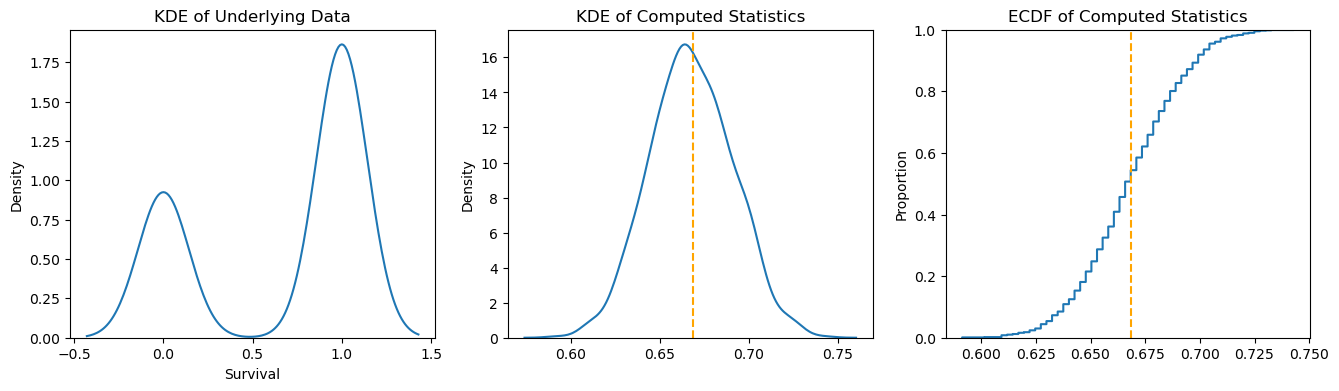

Variance of estimates is: 0.0005380128270365646


In [43]:
var = 'Survival'
estimates = simulate(var, dfconservative, stat)

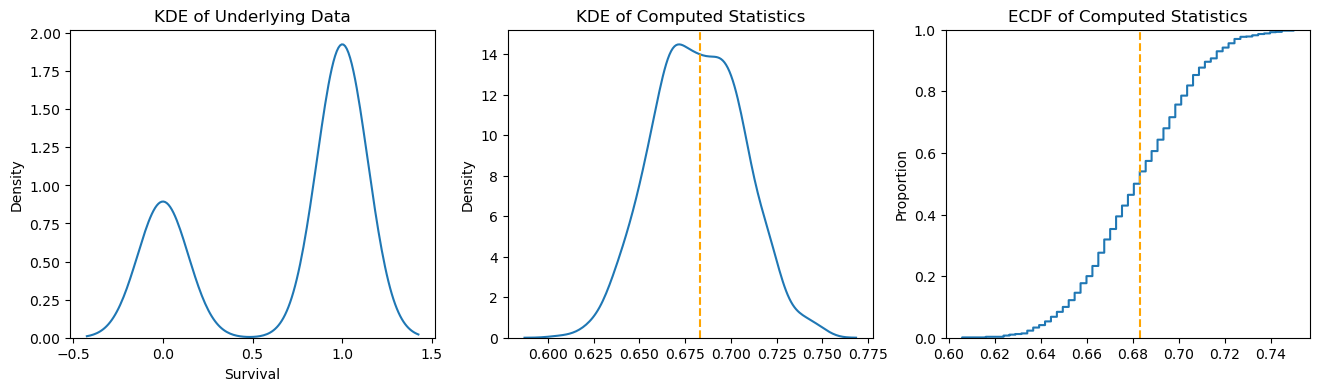

Variance of estimates is: 0.0005931450672228719


In [44]:
var = 'Survival'
estimates = simulate(var, dfinvasive, stat)

In [47]:
def stat_diff(x, y):
    stat = np.mean(x) - np.mean(y)
    return stat

In [50]:
def simulate(var, df1, df2, fcn, S=1000, plot=True):
    ''' Bootstrap simulation code. '''    
    x = df1[var]
    y = df2[var]

    estimates = []
    for s in range(S):
        # Draw a new sample, with replacement:
        x_s = x.sample(frac=1.0,replace=True)
        y_s = y.sample(frac=1.0,replace=True)
        # Compute statistic:
        stat_s = fcn(x_s, y_s)
        # Append estimate:
        estimates.append(stat_s)
    estimates = np.array(estimates) # Convert estimates list to numpy array

    ## or in one line, 
    #estimates = [fcn(x.sample(frac=1.0,replace=True)) for s in range(S)]

    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 2 columns
        sns.kdeplot(x, ax = axes[0]).set(title='KDE of Underlying Data')
        sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics')
        axes[1].axvline(x=fcn(x, y), color='orange', linestyle='--')
        sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics')
        axes[2].axvline(x=fcn(x, y), color='orange', linestyle='--')
        plt.show()
        print(f'Variance of estimates is: {np.var(estimates)}')
        
    return estimates

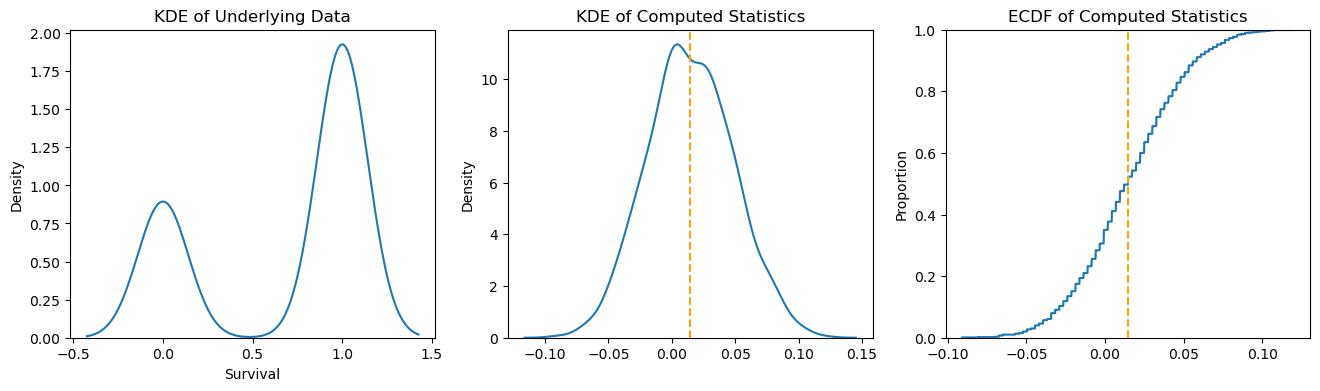

Variance of estimates is: 0.0011216395439502351


In [51]:
var = 'Survival'
estimates = simulate(var, dfinvasive, dfconservative, stat_diff)

There doesn't seem to be a huge difference in survival rates. THe observed difference line of the KDE is a positive non-zero value, indicating that the invasive procedure is slightly more effective at helping people survive (~2% higher survival rate). The peak is at 0 though, representing that there is 0 difference for most of the sampled population. 

### Exercise 4: Prediction Uncertainty
- Pick a dataset and two continuous variables.
- Recall the LCLS estimator:
$$
\hat{y}(z) =  \frac{ \frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left( \frac{z - x_i}{h} \right)}{ \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k\left( \frac{z - x_i}{h} \right)}
$$
with the Epanechnikov kernel and the standard plug-in bandwidth for $h$
- Compute and plot this line for 30 bootstrap samples. Notice where there is a lot of variation in the predictions, versus little variation in the predictions.
- Now, for any $z$, we can bootstrap a distribution of predictions using the above formula. Do this at the 25th percentile, median, and 75th percentile of $X$, and make KDE plots of your results.
- Now, pick a grid for $z$: Obvious choices are all of the unique values in the data, or an equally spaced grid from the minimum value to the maximum value. For each $z$, bootstrap a sample of predictions and compute the .05 and .95 quantiles. Plot these error curves along with your LCLS estimate. Where are your predictions "tight"/reliable? Where are they highly variable/unreliable?

In [ ]:
def stat_lcls(x, y, h=None):
    n = len(x)
    grid = np.sort(x.unique())
    if h is None:
        iqr = np.quantile(x,.75) - np.quantile(x,.25)
        h = 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)

    # Compute kernel:
    I = -(x.to_numpy().reshape(-1,1)-grid.reshape(1,-1) )**2
    K = np.exp(I/(2*h**2) )/np.sqrt(2*np.pi*h**2)

    # Compute LCLS estimator:
    numerator = y@K # Compute the numerator
    denominator = np.sum(K,axis=0) # Compute denominator
    y_hat = numerator/denominator # Compute estimator


    return y_hat, grid
    

In [ ]:
def simulate(var, df1, df2, fcn, S=1000, plot=True):
    ''' Bootstrap simulation code. '''    
    x = df1[var]
    y = df2[var]

    estimates = []
    for s in range(S):
        # Draw a new sample, with replacement:
        x_s = x.sample(frac=1.0,replace=True)
        y_s = y.sample(frac=1.0,replace=True)
        # Compute statistic:
        stat_s = fcn(x_s, y_s)
        # Append estimate:
        estimates.append(stat_s)
    estimates = np.array(estimates) # Convert estimates list to numpy array

    ## or in one line, 
    #estimates = [fcn(x.sample(frac=1.0,replace=True)) for s in range(S)]

    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 2 columns
        sns.kdeplot(x, ax = axes[0]).set(title='KDE of Underlying Data')
        sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics')
        axes[1].axvline(x=fcn(x, y), color='orange', linestyle='--')
        sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics')
        axes[2].axvline(x=fcn(x, y), color='orange', linestyle='--')
        plt.show()
        print(f'Variance of estimates is: {np.var(estimates)}')
        
    return estimates